In [24]:
from sympy.solvers import solve, nsolve
from sympy import Symbol
from typing import Callable
import matplotlib.pyplot as plt
import numpy, math, sympy

# Problem 4

Write a `MATLAB` funcion, called `bisection_method` that takes as inputs a function $f$, two numbers $a$, $b$, an error tolerance, `tol`, and a maximum number of iterations, $N$, and finds a root $c$ of $f$ in the interval $[a , b]$ using the bisection method. Your function should compute a bound on the error, and stop when the error is less than the tolerance, or if the number of iterations exceeds $N$ - whichever happens first.

## Function Definition

In [6]:
# function assumes max iterations is 100 if another maximum is not provided
def bisection_method(f: Callable, a: float, b: float, tol: float, N: int = 100) -> (float, int, float):
    # make sure a, b, and tol are floats
    numbers = [int, float]
    if(type(a) not in numbers or type(b) not in numbers or type(tol) not in numbers):
        print("a, b, and tol must be numbers")
        return

    # make sure N is an integer
    if(type(N) != int or N < 1):
        print("N must be a natural number.")
        return

    # make sure f(x) is callable
    if(not callable(f)):
        print("f(x) must be callable (e.g., a function)")
        return

    # make sure bisection method is cool
    if(f(a) * f(b) > 0):
        return

    # start iterating
    err = (b - a) / 2
    for i in range(N):
        # start evaluating at the halfway point
        c = (a + b) / 2
        
        # if we're in the tolerance range, exit the function
        if(err < tol):
            return(c, i + 1, err)

        # if f(c) == 0, we found a root
        if(f(c) == 0):
            return(c, i + 1, err)

        # otherwise, narrow down the search range
        if(f(a) * f(c) < 0):
            b = c
        else:
            a = c
        err = (b - a) / 2

    # if we exceeded maximum iterations, just return what we 
    # found
    # if I were putting this in some larger code base, I would 
    # probably include whether we exceeded the maximum
    # iterations in the return value, since the function might
    # get used in a way such that the user can't be expected to
    # look at the terminal (e.g., as a module)
    # ---------------------------------------------------------
    print("Maximum iterations exceeded.")
    return(c, i, err)

## Problem 4(c)

In [33]:
f = lambda x: (2*x**3 + 3*x - 1)*math.cos(x) - x
a = -1
b = 1
tol = 1e-5 # python allows E notation for floats

root, iterations, error = bisection_method(f, a, b, tol)
root

0.43856048583984375

### Problem 4(c.i)

What is the number, $n$, of iterations used?

In [8]:
iterations

18

### Problem 4(c.ii)

What is the error bound?

In [9]:
error

7.62939453125e-06

This is approximately equivalent to $7.6294 \times 10^{-6}$

### Problem 4(c.iii)

The expected rate of convergence for the bisection method can be expressed as $|x_n - c| \leq \frac{b - a}{2^n}$ where $n \in \mathbb{N}$. The big-O notation for this is $O(2^{-n})$

### Problem 4(c.iv)

Plot on the same graph the function $f$ and the axis $y = 0$ using the `hold on` command.

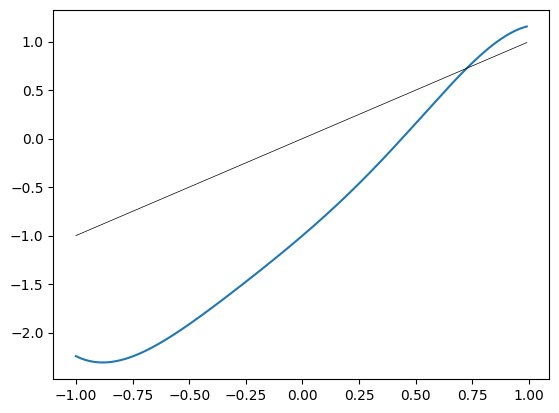

In [35]:
y_axis = numpy.arange(-1., 1., 0.01)
plt.plot(y_axis, [f(point) for point in y_axis])
plt.plot(y_axis, y_axis, "k", linewidth=0.5)
plt.show()

### Problem 4(c.v)

Using the built-in function solve from Matlab, compute the exact root and compare it to your solution.

In [22]:
x = Symbol("x")
equation = (2*x**3 + 3*x - 1)*sympy.cos(x) - x
solve(equation, x)

NotImplementedError: multiple generators [x, cos(x)]
No algorithms are implemented to solve equation -x + (2*x**3 + 3*x - 1)*cos(x)

The above code doesn't work because sympy does not have an algorithm to solve an equation with so many roots. What we can do instead is give it some initial guesses to start with.

In [46]:
guesses = numpy.arange(-1, 1, 0.01)
solutions = [nsolve(equation, x, guess) for guess in guesses]

# remove duplicates
solutions = list(set(solutions))

# remove stuff outside range
[solutions.remove(solution) if abs(solution) > 1 else 1 + 1 for solution in solutions]

# the set() constructor does not preseve order
solutions.sort()
solutions

[-1.44320061496181, 0.438567457709801]

# Problem 5

Write a `MATLAB` function, called `fixed_point_method` that takes as inputs a function, $g$, an initial guess $x_0$, an error tolerance, `tol`, and a maximum number of iterations, $N$, and outputs the fixed point of g, obtained using the fixed point method, starting with $x_0$. Your function should have an error defined by $E = |x_n - x_{n-1}|$, which is the absolute difference between the last two iterations, and stop when that error is less than the tolerance, or if the number of iterations exceeds $N$ - whichever happens first. Your function header should look something like:

`function [c, n, err] = fixed_point_method(g, x0, tol, N)`

In [34]:
# function assumes x_0 = 0, tol = 10^-5, and N = 100 if no
# other values are specified
# ---------------------------------------------------------
def fixed_point_method(g: Callable, x_0: float = 0, tol: float = 1e-5, N: int = 100) -> (float, int, float):
    # check if g is a function
    if(not callable(g)):
        print("g(x) must be callable (e.g., a function).")
        return

    # check if x_0 and tol are numbers
    numbers = [int, float]
    if(type(x_0) not in numbers or type(tol) not in numbers):
        print("x_0 and tol must be numbers.")
        return

    # check if N is a natural number
    if(type(N) != int or N < 1):
        print("N must be a natural number")
        return

    # start iterating
    for i in range(N):
        print(x_0)
        # evaluate at current guess
        c = g(x_0)
        err = abs(c - x_0)
        if(abs(c - x_0) < tol):
            return(c, i, err)
        x_0 = c

    # if we exceeded maximum iterations, just return what we 
    # found
    # same as before about including this fact in return value
    # ---------------------------------------------------------
    print("Maximum iterations exceeded")
    return(x, i, err)

# Problem 6

Write a `MATLAB` function, called `Newtons_method` that takes as inputs a function, $f$, its derivative, $f'$, an initial guess $x_0$, an error tolerance, `tol`, and a maximum number of iterations, $N$, and outputs the root of $f$ obtained using Newton's method (denoted by $c$). Your function should have an error defined by `err = |`$x_n - x_{n-1}$`|`, and stop when the error is less than the tolerance, or if the number of iterations exceeds $N$ - whichever happens first. Your function header should look something like:

`function [c, n, err] = Newtons_method(f, fp, x0, tol, N)`

Where `n` is the last iteration when you stop.

Use the function you created to find the root of the equation $arctan(x) = 1$ with an initial guess $x_0 = 2$, to an accuracy of less than $tol = 10^{-8}$. **(Written)** Did your method converge, and if so, how many iterations did it take? If not, why didn't it converge, and what happened-did it diverge, or end up in an infinite loop? Plot on the same graph the function and the axis $y = 0$. Test with $x_0 = -2$. What is happening?

In [57]:
def newtons_method(f: callable, fp: callable, x_0: float = 0, tol: float = 1e-5, n: int = 100) -> (float, int, float):
    # make sure a, b, and tol are floats
    numbers = [int, float]
    if(type(x_0) not in numbers or type(tol) not in numbers):
        print("x_0 and tol must be numbers")
        return

    # make sure N is an integer
    if(type(n) != int or n < 1):
        print("n must be a natural number.")
        return

    # make sure f(x) is callable
    if(not callable(f)):
        print("f(x) must be callable (e.g., a function)")
        return

    # make sure method is cool
    # if(f(a) * f(b) > 0):
    #     return

    # a function to approximate the derivative

    # start iterating
    for i in range(n):
        # approximate derivative, detect divergence
        try:
            f_prime = fp(x_0)
        except OverflowError:
            print("function diverges")
            return(float("inf"), i, float("inf"))
        except Exeption as e:
            print(f"Other error: {e}")
            return
        j = 0

        # try to escape local minima
        for j in range(n):
            if(f_prime != 0):
                break
            x_0 += tol
            # detect divergence
            try:
                f_prime = fp(x_0)
            except OverflowError:
                print("function diverges")
                return(float("inf"), i, float("inf"))
            except Exeption as e:
                print(f"Other error: {e}")
                return
        if(f_prime == 0):
            print("stuck in local extrema")
            return
        
        # find the root guess
        c = x_0 - f(x_0) / f_prime
        err = abs(c - x_0)

        # if step size is smaller than tolerance, return
        if(abs(err) < tol):
            return(c, i + 1, err)

        # if f(c) == 0, we found the root
        if(f(c) == 0):
            return(c, i + 1, err)

        # otherwise continue search from c
        x_0 = c

    # if the loop completes, that means we exceeded the
    # iteration number. In that case, we return what we found
    # ---------------------------------------------------------
    print("Maximum iterations exceeded")
    return(x_n, i, err)

In [65]:
newtons_method(lambda x: math.atan(x) - 1, lambda x: 1 / (x**2 + 1), x_0=2, tol=1e-8)

(1.5574077246549023, 5, 2.1656010318338303e-11)

In [64]:
newtons_method(lambda x: math.atan(x) - 1, lambda x: 1 / (x**2 + 1), x_0=-2, tol=1e-8)

function diverges


(inf, 9, inf)

The method converges when $x_0 = 2$ in five iterations.

# Problem 8

ZeroDivisionError: division by zero